In [ ]:
#Iris.csv


PCA

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [5]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.shape

(150, 6)

In [10]:
X_variables = data.iloc[:,1:5]
X_variables

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y_variable = data.iloc[:,5]
y_variable

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [12]:
messages=data.copy()
messages.reset_index(inplace=True)
messages.head(10)

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [13]:
sc = StandardScaler()
transformed_df = sc.fit_transform(X_variables)

In [14]:
covariance_matrix = np.cov(transformed_df.T)
covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [15]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues arranged in descending order:
2.930353775589317
0.9274036215173428
0.14834222648163967
0.020746013995595967


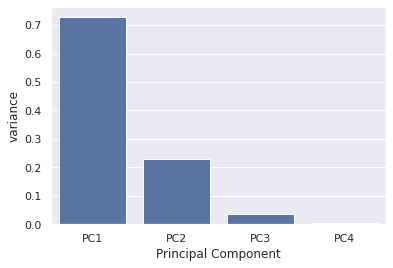

In [16]:
pca = PCA()
pca = pca.fit(transformed_df)
explained_variance = pca.explained_variance_ratio_
dataframe = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4']})
sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="b");

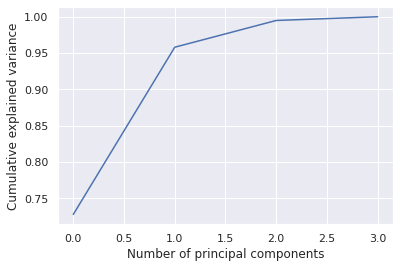

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [18]:

pca_2 = PCA(n_components =2 )
pca_2 = pca_2.fit(transformed_df)
pca_2d = pca_2.transform(X_variables)

In [21]:
data['Species'] = data['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

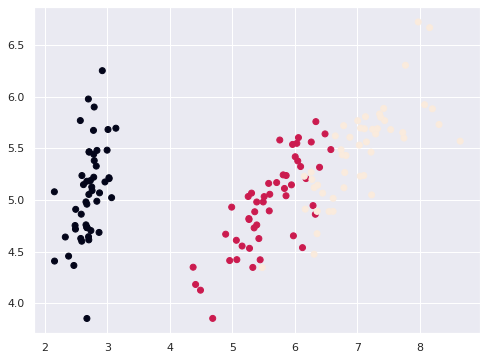

In [22]:
plt.figure(figsize=(8,6))

plt.scatter(pca_2d[:,0], pca_2d[:,1],c=data['Species'])
plt.show()

In [23]:
pca_4 = PCA(n_components =4 )
pca_4 = pca_4.fit(transformed_df)
pca_4d = pca_4.transform(X_variables)

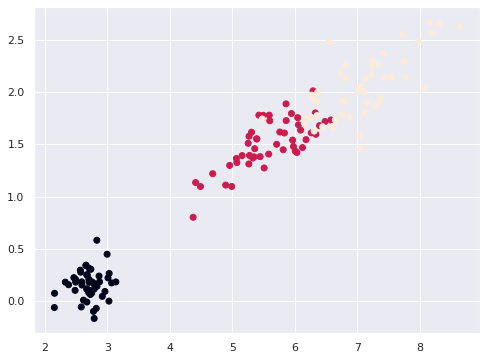

In [25]:
plt.figure(figsize=(8,6))

plt.scatter(pca_4d[:,0], pca_4d[:,3],c=data['Species'])
plt.show()

SVD

In [26]:
#mushrooms.csv
from google.colab import files
uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


In [27]:
data2=pd.read_csv("mushrooms.csv")
data2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [28]:
data2.shape

(8124, 23)

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [35]:

encoder = LabelEncoder()
for col in data2.columns:
    data2[col] = encoder.fit_transform(data2[col])
data2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [36]:
X_variables = data2.iloc[:,1:23]
y_label = data2.iloc[:, 0]

In [37]:
scaler = StandardScaler()
X_features = scaler.fit_transform(X_variables)

In [38]:
u, s, v = np.linalg.svd(X_features, full_matrices=True)

In [39]:
u.shape

(8124, 8124)

In [40]:
s.shape

(22,)

In [41]:
v.shape

(22, 22)

In [43]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 


array([0.184, 0.124, 0.114, 0.103, 0.081, 0.066, 0.047, 0.045, 0.037,
       0.034, 0.027, 0.026, 0.024, 0.023, 0.018, 0.015, 0.01 , 0.008,
       0.006, 0.003, 0.003, 0.   ])

Text(0, 0.5, 'Percent of the variance explained')

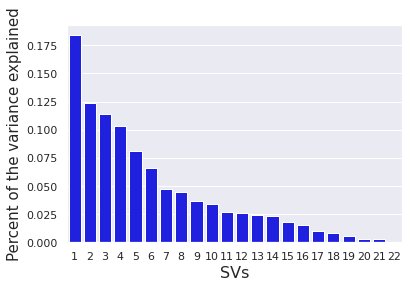

In [45]:
sns.barplot(x=list(range(1,len(variance_explained)+1)),
            y=variance_explained, color="blue")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [47]:
col_labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=data2["class"].tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

,Class,SV1,SV2
0,1,0.003238,-0.006710
1,0,0.012864,0.001919
2,0,0.010474,-0.001863
3,1,0.004988,-0.005202
4,0,-0.003887,0.008522


In [48]:
svd_df['Class'] = svd_df['Class'].replace({1:'Edible', 0:'Poison'})

Text(0, 0.5, 'SV 2: 12.4%')

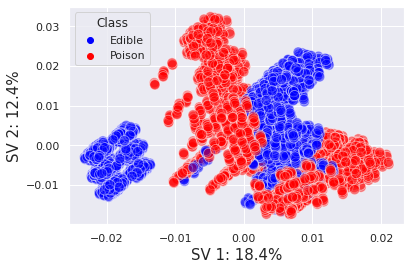

In [50]:
color_dict = dict({'Edible':'Blue',
                   'Poison': 'Red'})
# Scatter plot: SV1 and SV2
sns.scatterplot(x="SV1", y="SV2", hue="Class", 
                palette=color_dict, 
                data=svd_df, s=105,
                alpha=0.5)
plt.xlabel('SV 1: {0}%'.format(variance_explained[0]*100), fontsize=15)
plt.ylabel('SV 2: {0}%'.format(variance_explained[1]*100), fontsize=15)

LLE

In [53]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 36 kB/s 
     |████████████████████████████████| 198 kB 54.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=ff5f50fb786e7f9b6817b4f7b52b38c6ce7805c74518d0d79aab0d308f08d8e9
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [54]:
from sklearn import datasets
from pyspark.sql import SQLContext as SQC
from pyspark.mllib.linalg import Vectors as mllibVs, VectorUDT as mllibVUDT
from pyspark.ml.linalg import Vectors as mlVs, VectorUDT as mlVUDT
from pyspark.sql.types import *
from pyspark.mllib.linalg import *
from pyspark.sql.functions import *
from pyspark.ml.feature import StandardScaler
from pyspark.mllib.linalg.distributed import IndexedRowMatrix
import math as m
import numpy as np

In [58]:
def get_weights(map_list, k, features, reg):


    sorted_map = sorted(map_list, key = lambda x: x[1])[1:(k+1)]

    neighbors = np.array([s[2] for s in sorted_map])
    ind = [s[0] for s in sorted_map]

    nbors, n_features = neighbors.shape

    neighbors_mat = neighbors - features.toArray().reshape(1,n_features)

    cov_neighbors = np.dot(neighbors_mat, neighbors_mat.T)

    # add regularization term
    trace = np.trace(cov_neighbors)
    if trace > 0:
        R = reg * trace
    else:
        R = reg

    cov_neighbors.flat[::nbors + 1] += R

    weights = linalg.solve(cov_neighbors, np.ones(k).T, sym_pos=True)
    weights = weights/weights.sum()

    full_weights = np.zeros(len(map_list))
    full_weights[ind] = weights

    return(Vectors.dense(full_weights))

udf_sort = udf(get_weights, mllibVUDT())

data2 = data2.withColumn("weights", udf_sort("map", lit(10), "features", lit(0.001)))

In [58]:
# udf for creating a row of identity matrix 
def I(ind):
    i = [0]*150
    i[ind]=1.0
    return(mllibVs.dense(i))

# convert dataframe to indexedrowmatrix
weights_irm = IndexedRowMatrix(data2.select(["id","weights"]).rdd.map(lambda x:(x[0],  I(x[0])-x[1])))
M = weights_irm.toBlockMatrix().transpose().multiply( weights_irm.toBlockMatrix() )

SVD = M.toIndexedRowMatrix().computeSVD(150, True)

# select the vectors for low dimensional embedding
lle_embbeding = np.fliplr(SVD.V.toArray()[:,-(d+1):-1])

t-SNE


In [63]:
import numpy as np
from sklearn.manifold import TSNE
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
tsne = TSNE(n_components=2)
tsne.fit_transform(X)
print(tsne.embedding_)
'''输出
[[   3.17274952 -186.43092346]
 [  43.70787048 -283.6920166 ]
 [ 100.43157196 -145.89025879]
 [ 140.96669006 -243.15138245]]'''

[[174.17831  189.75137 ]
 [332.5468   340.47995 ]
 [ 23.449465 348.1196  ]
 [181.81798  498.8482  ]]


'输出\n[[   3.17274952 -186.43092346]\n [  43.70787048 -283.6920166 ]\n [ 100.43157196 -145.89025879]\n [ 140.96669006 -243.15138245]]'

t-SNE: 7.2 sec


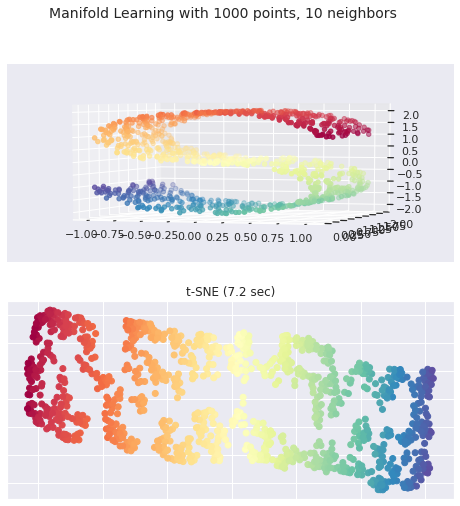

In [67]:
# coding='utf-8'

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets
from sklearn.datasets import samples_generator

# # Next line to silence pyflakes. This import is needed.
# Axes3D

n_points = 1000
\
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(8, 8))

plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72) 

'''t-SNE'''
t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X) 
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))  
ax = fig.add_subplot(2, 1, 2)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())  
ax.yaxis.set_major_formatter(NullFormatter())
# plt.axis('tight')

plt.show()

Computing t-SNE embedding


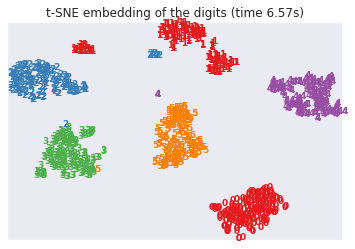

In [68]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.manifold import TSNE


def get_data():
    digits = datasets.load_digits(n_class=6)
    data = digits.data
    label = digits.target
    n_samples, n_features = data.shape
    return data, label, n_samples, n_features


def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)

    fig = plt.figure()
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
                 color=plt.cm.Set1(label[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig


def main():
    data, label, n_samples, n_features = get_data()
    print('Computing t-SNE embedding')
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    t0 = time()
    result = tsne.fit_transform(data)
    fig = plot_embedding(result, label,
                         't-SNE embedding of the digits (time %.2fs)'
                         % (time() - t0))
    plt.show(fig)


if __name__ == '__main__':
    main()

ISOMAP

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import sys
 
def distancematrix(test):
    leng=len(test)
    resmat=np.zeros([leng,leng],np.float32)
    for i in range(leng):
      for j in range(leng):
          resmat[i,j]=np.linalg.norm(test[i]-test[j])
    return resmat
def mds(test,deg):
    length= len(test)
    re= np.zeros((length, length),np.float32)
    if(deg>length):
        deg=length
    D= distancematrix(test)
    ss = 1.0 /length ** 2 * np.sum(D ** 2)
    for i in range(length):
        for j in range(length):
            re[i, j] = -0.5 * (D[i, j] ** 2 - 1.0 / length * np.dot(D[i, :], D[i, :]) - 1.0 / length * np.dot(D[:, j], D[:, j]) + ss)
 
    A, V = np.linalg.eig(re)
    list_idx = np.argpartition(A, deg- 1)[-deg:]
    a = np.diag(np.maximum(A[list_idx], 0.0))
    return np.matmul(V[:, list_idx], np.sqrt(a))

def usedijk(test, start):
    count = len(test)
    col= test[start].copy()
    rem = count - 1
    while rem > 0:
        i= np.argpartition(col, 1)[1]
        length = test[start][i]
        for j in range(count):
            if test[start][j] > length + test[i][j]:
                test[start][j] = length + test[i][j]
                test[j][start] = test[start][j]
        rem -= 1
        col[i] = float('inf')
 

def isomap(test, target, k):
    inf = float('inf')
    count = len(test)
    if k >= count:
        raise ValueError('K is too large')
    mat_distance = distancematrix(test)
    knear = np.ones([count, count], np.float32) * inf
    for idx in range(count):
        topk = np.argpartition(mat_distance[idx], k)[:k + 1]
        knear[idx][topk] = mat_distance[idx][topk]
    for idx in range(count):
        usedijk(knear, idx)
    return mds(knear, target)
 
if __name__ == '__main__':
    print('start.....')
    D =np.array([[1,2,3,4],[2,1,5,6],[3,5,1,7],[4,6,7,1]]) #test data
    outcome= isomap(D, 2, 3)
    sys.stdout.write('finish\n')
    print(outcome) 
 
 

start.....
finish
[[ 2.6146607   2.1883557 ]
 [ 2.7561336   3.141336  ]
 [ 3.0071628  -5.1849847 ]
 [-8.377956   -0.14470631]]


UMAP

In [71]:
pip install umap-learn


     |████████████████████████████████| 86 kB 5.9 MB/s 
     |████████████████████████████████| 1.1 MB 28.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=8ea8a20b0f21ca8e575cf641c531ae983255ef6739155cba993087cf8a4a0658
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=0285be8a68ddfa1785fd3d4fb28008dbabce69852281827d329d29d766fefdcd
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import umap 

    for i in range(listLength):
        my_value[i] = np.array(my_value[i]).reshape(-1, 64)
        reducer = umap.UMAP(random_state=42)  
        embedding = reducer.transform(my_value[i])
        data[i] = embedding